## Imports

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


## Data retrieving

In [79]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [80]:
on = pd.read_csv('giroscope_mpu_on.csv')
off = pd.read_csv('giroscope_mpu_off.csv')
live = pd.read_csv('giroscope_mpu_live.csv')

In [81]:
on.head(1)

,id,x,y,z,date_mpu,time_mpu,time_float
0,1,-852,-6288,13332,2022-03-24,17:08:00,17.1333


In [82]:
off.head(1)

,id,x,y,z,date_mpu,time_mpu,time_float
0,101,-1412,1064,15756,2022-03-25,20:20:59,20.3497


In [83]:
live.head(1)

,id,x,y,z,date_mpu,time_mpu,time_float
0,1,8404,13696,-4676,2022-03-26,15:53:58,15.8994


## Data analysis

In [84]:
on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          60 non-null     int64  
 1   x           60 non-null     int64  
 2   y           60 non-null     int64  
 3   z           60 non-null     int64  
 4   date_mpu    60 non-null     object 
 5   time_mpu    60 non-null     object 
 6   time_float  60 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.4+ KB


In [85]:
off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          642 non-null    int64  
 1   x           642 non-null    int64  
 2   y           642 non-null    int64  
 3   z           642 non-null    int64  
 4   date_mpu    642 non-null    object 
 5   time_mpu    642 non-null    object 
 6   time_float  642 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 35.2+ KB


In [86]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          700 non-null    int64  
 1   x           700 non-null    int64  
 2   y           700 non-null    int64  
 3   z           700 non-null    int64  
 4   date_mpu    700 non-null    object 
 5   time_mpu    700 non-null    object 
 6   time_float  700 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 38.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


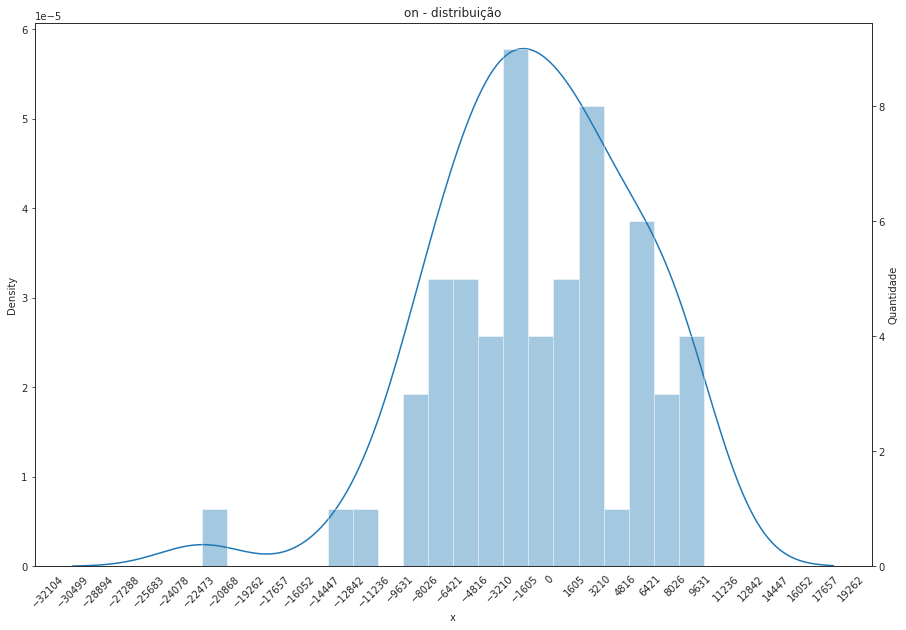

In [87]:

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(on["x"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(on["x"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos

g2.set_ylabel("Quantidade")
g2.set_title("on - distribuição" )
g1.xaxis.set_major_locator(ticker.MultipleLocator((on["x"].max()-on["x"].min())/bins))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


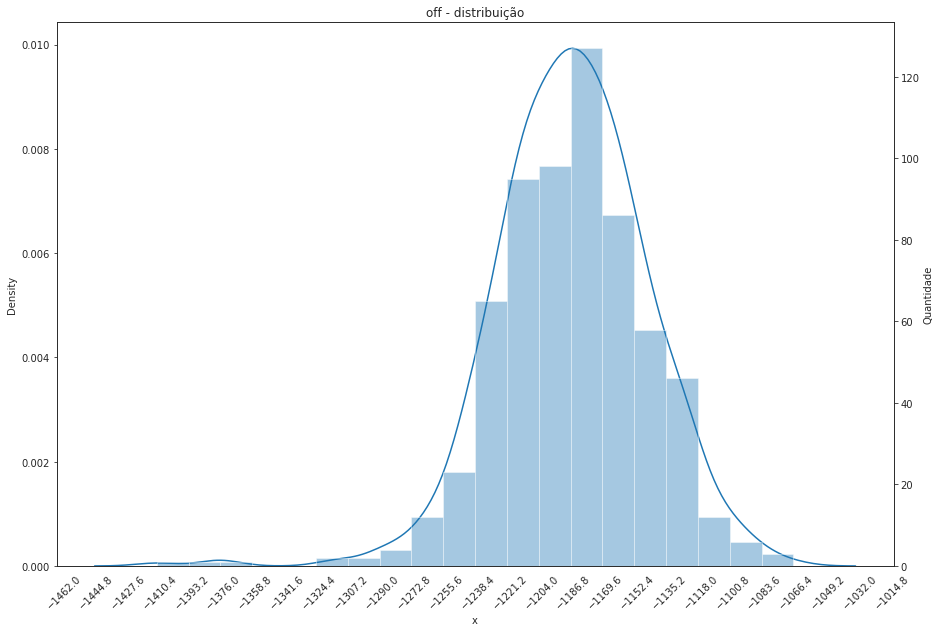

In [88]:
bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(off["x"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(off["x"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos

g2.set_ylabel("Quantidade")
g2.set_title("off - distribuição" )
g1.xaxis.set_major_locator(ticker.MultipleLocator((off["x"].max()-off["x"].min())/bins))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


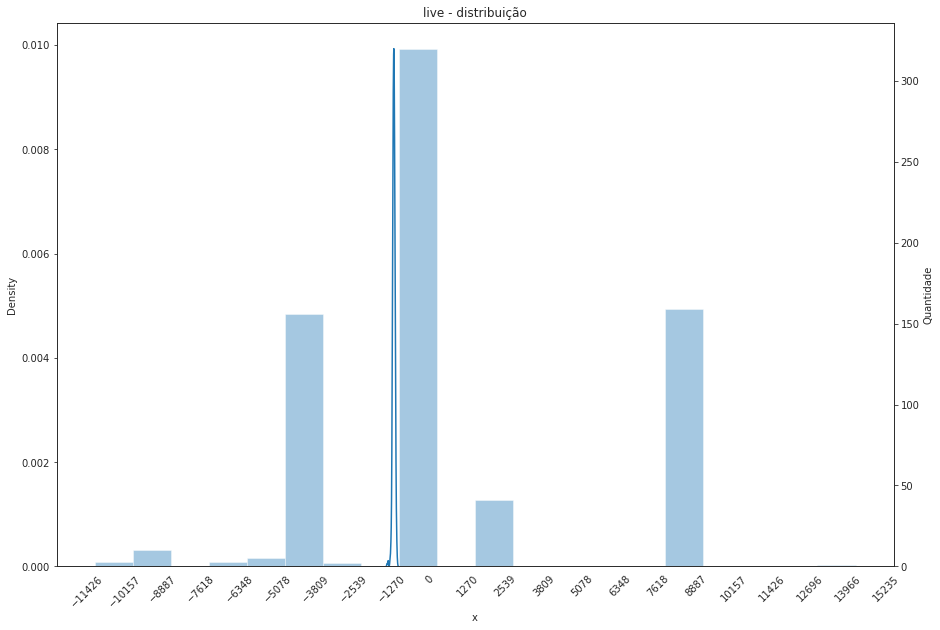

In [89]:
bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(off["x"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(live["x"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos

g2.set_ylabel("Quantidade")
g2.set_title("live - distribuição")
g1.xaxis.set_major_locator(ticker.MultipleLocator((live["x"].max()-live["x"].min())/bins))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

## Data engineering

In [90]:
on['movimento'] = [1] * on.shape[0]
on.head(1)

,id,x,y,z,date_mpu,time_mpu,time_float,movimento
0,1,-852,-6288,13332,2022-03-24,17:08:00,17.1333,1


In [91]:
off['movimento'] = [0] * off.shape[0]
off.head(1)

,id,x,y,z,date_mpu,time_mpu,time_float,movimento
0,101,-1412,1064,15756,2022-03-25,20:20:59,20.3497,0


In [92]:
df = pd.concat([on, off])
df.head(5)

,id,x,y,z,date_mpu,time_mpu,time_float,movimento
0,1,-852,-6288,13332,2022-03-24,17:08:00,17.1333,1
1,2,-11240,-4752,11148,2022-03-24,17:08:18,17.1383,1
2,3,288,-1656,8444,2022-03-24,17:08:33,17.1425,1
3,4,6144,-4272,17420,2022-03-24,17:08:49,17.1469,1
4,5,1420,900,15400,2022-03-24,17:09:05,17.1514,1


In [93]:

df.drop(['id', 'date_mpu', 'time_mpu', 'time_float'], axis=1, inplace=True)
X = df[['x', 'y', 'z']]
Y = df['movimento']

## Machine Learning using Support Vector Machine

In [94]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE


In [95]:
sm = SMOTE(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, stratify=Y)
X_train, y_train = sm.fit_resample(x_train, y_train)


In [96]:

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [97]:
y_pred = clf.predict(x_test)

## Accuracy verification

In [98]:
score = clf.score(x_test, y_test)
print(score)

0.9857651245551602


In [99]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[257   0]
 [  4  20]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       257
           1       1.00      0.83      0.91        24

    accuracy                           0.99       281
   macro avg       0.99      0.92      0.95       281
weighted avg       0.99      0.99      0.99       281

